# Curve and Scatter - Advanced

The basic usage of the ```Curve``` and ```Scatter``` classes is described in the basic_plotting.ipynb notebook. This notebook describes some more advanced features of these classes. First, import the necessary libraries:

In [1]:
import graphinglib as gl
import numpy as np

## Interpolation

You can easily get the y-value of a curve or scatter at a given point through interpolation by using the ```get_point_at_x()``` and ```get_points_at_y()```methods. These methods return a list of points, since there may be multiple points at a given x or y value. You can thenn access the x or y value of the point(s) using the ```x``` and ```y``` attributes of the ```Point``` class.

1.9055806033079223
1.1693818760104524
3.2854032992919615
4.940798054222626


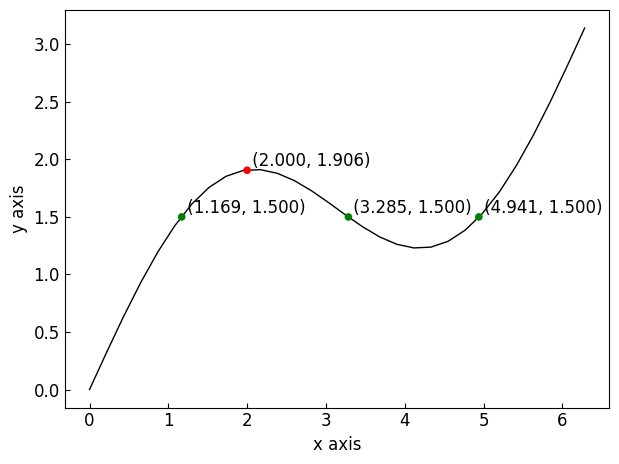

In [2]:
curve = gl.Curve.from_function(lambda x: np.sin(x) + 0.5 * x, 0, 2 * np.pi, number_of_points=30)

# Getting a point at x = 2
point_x2 = curve.get_point_at_x(2, color="red")
point_x2.add_coordinates()
print(point_x2.y)

# Getting the points at y = 1.5
points_y1_5 = curve.get_points_at_y(1.5, color="green")
for point in points_y1_5:
    point.add_coordinates()
    print(point.x)

fig = gl.Figure()
fig.add_element(curve, point_x2, *points_y1_5)
fig.display()

## Arithmetic operations

New curves can be obtained by adding, subtracting, multiplying or dividing two curves. The result is a new curve with the same x-values as the first curve. The y-values are the result of the operation applied to the y-values of the two curves. The start and end of the x-values must be the same for both objects. In the case of Scatter, the number of points must also be the same, though this is not necessary for Curve objects as the missing points are interpolated.

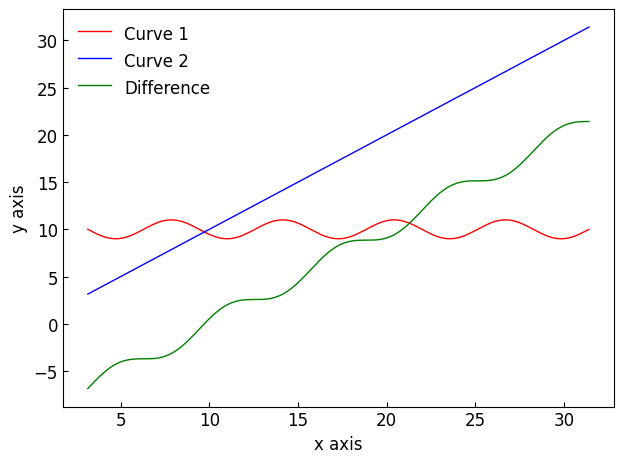

In [3]:
curve_1 = gl.Curve.from_function( lambda x: np.sin(x) + 10, np.pi, 10 * np.pi, color="red", label="Curve 1")
curve_2 = gl.Curve.from_function( lambda x: x, np.pi, 10 * np.pi, color="blue" , label="Curve 2")

curve_sum = curve_1 + curve_2
curve_difference = curve_2 - curve_1
curve_product = curve_1 * curve_2
curve_quotient = curve_1 / curve_2

curve_difference.color = "green"
curve_difference.label = "Difference"

fig = gl.Figure()
fig.add_element(curve_1, curve_2, curve_difference)
fig.display()

The minimum and maximum of a curve can be obtained using the min() and max() functions:

In [4]:
print(max(curve_1))
print(min(curve_1))

10.999995045403306
9.000123862462562


## Derivatives and integrals

GraphingLib makes it easy to calculate the derivative or integral of a curve. The derivative is calculated using the ```get_derivative_curve()``` method. The integral is calculated using the ```get_integral_curve()``` method. Both methods return a new Curve object with the same x-values as the original curve.

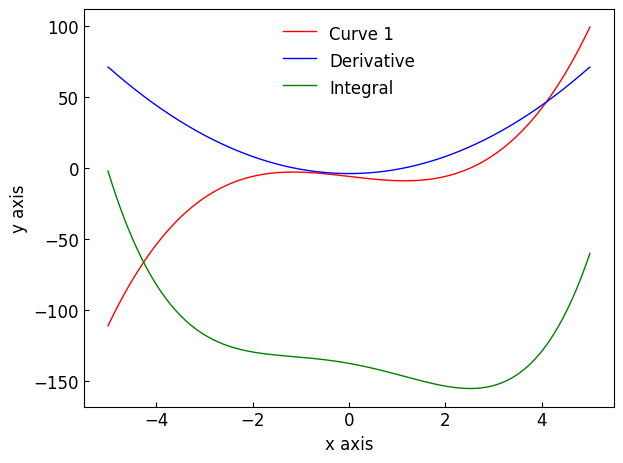

In [5]:
curve = gl.Curve.from_function(lambda x: x**3 - 4*x - 6, -5, 5, color="red", label="Curve 1")

derivative = curve.get_derivative_curve(label="Derivative", color="blue")
integral = curve.get_integral_curve(label="Integral", color="green")

fig = gl.Figure()
fig.add_element(curve, derivative, integral)
fig.display()

Similarly, it is also possible to plot the tangent and normal to a curve at a given point.

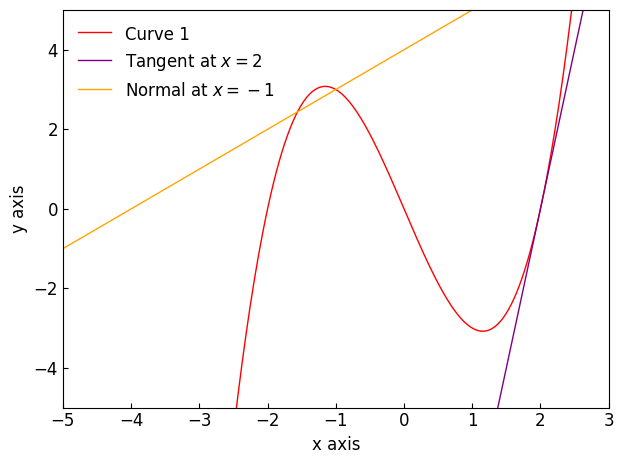

In [6]:
curve = gl.Curve.from_function(lambda x: x**3 - 4*x, -5, 5, color="red", label="Curve 1")
tangent = curve.get_tangent_curve(2, label="Tangent at $x=2$", color="purple")
normal = curve.get_normal_curve(-1, label="Normal at $x=-1$", color="orange")

fig = gl.Figure(x_lim=(-5,3),y_lim=(-5,5))
fig.add_element(curve, tangent, normal)
fig.display()

To get the slope of a Curve at a given point, use the ```slope_at()``` method.

In [7]:
print(curve.slope_at(2))
print(tangent.slope_at(2))

8.000654615844917
8.000654615844917


To get the area under a curve between two x values, use the ```area_between()``` method. Setting the ```fill_under``` parameter to True will fill the area under the curve.

47.24969261535344


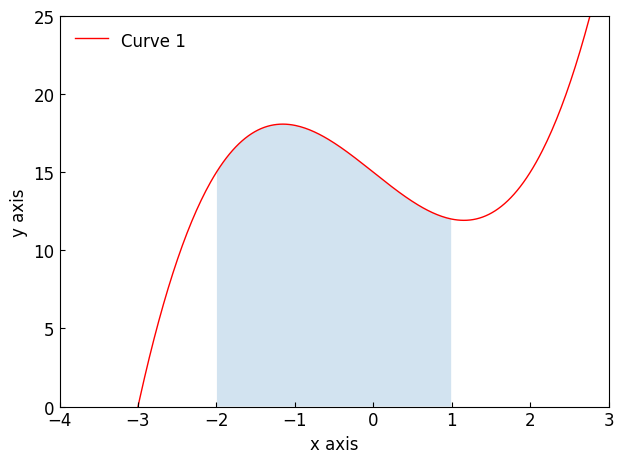

In [8]:
curve = gl.Curve.from_function(lambda x: x**3 - 4*x + 15, -5, 5, color="red", label="Curve 1")
area = curve.area_between(-2, 1, fill_under=True)
print(area)

fig = gl.Figure(x_lim=(-4, 3),y_lim=(0, 25))
fig.add_element(curve)
fig.display()


## Miscellaneous

To get the arc length of a curve between two x values, use the ```arc_length_between()``` method.

In [9]:
arc_length = curve.arc_length_between(-2, 1)
arc_length

9.814301347877997

To find the intersection points between two curves, use the ```intersection()``` method. This method returns a list of points, since there may be multiple intersection points. The coordinates of the intersection points can be accessed using the ```x``` and ```y``` attributes of the ```Point``` class.

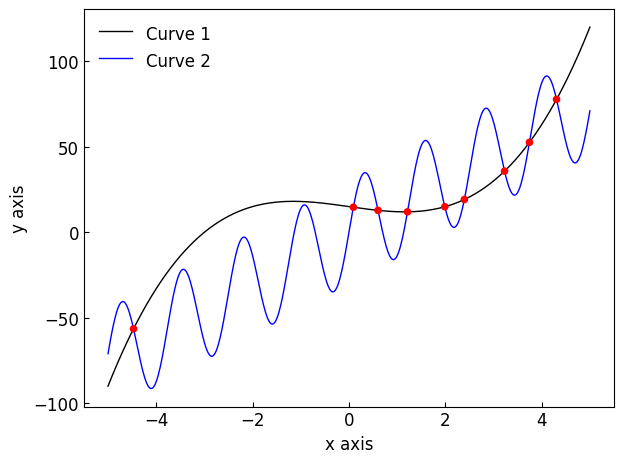

In [10]:
curve_1 = gl.Curve.from_function(lambda x: x**3 - 4*x + 15, -5, 5, color="black", label="Curve 1")
curve_2 = gl.Curve.from_function(lambda x: 30*np.sin(5*x) + 15*x, -5, 5, color="blue", label="Curve 2")
points = curve_1.intersection(curve_2, colors="red")

fig = gl.Figure()
fig.add_element(curve_1, curve_2, *points)
fig.display()